# Wrangle and Analyze Data Project

## Intoduction

In this project I will be wrangling & analyzing WeRateDogs data set by first gathering data then assessing the data and finally cleaning data

## Gathering

Gathering phase is divided into 3 steps:<br>
 1)Manually downloading (twitter_archive_enhanced.csv) file<br>
 2)Programmatically downloading (image_predictions.tsv) file using Python's Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv <br>
 3)I will use Python's Tweepy library and store JSON object data of each tweet in a file called tweet_json.txt 

In [202]:
#Here I'm importing all libraries I might use

#to be used in step 1
import pandas as pd

#to be used in step 2
import requests

#to be used in step 3
import tweepy 
#to be used in step 3
import json



#to be used later on
from IPython.display import HTML, display
import re
import functools 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1

In [203]:
#reading the twitter_archive_enhanced.csv file
df_archive =pd.read_csv("twitter-archive-enhanced.csv")


In [204]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [205]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Step 2

In [206]:
#Programmatically connecting to this(downloading) Url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [207]:
#confirming
response

<Response [200]>

In [208]:
#here after downloading the URL its time to write the content of the URL
with open("image_predictions.tsv",mode="wb") as file:
    file.write(response.content)

In [209]:
#after checking that the previous step has worked now it time to read that file 
image_predictions = pd.read_csv("image_predictions.tsv",sep="\t")


In [210]:
#confirming
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [211]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


I got confused here and I used stackOverflow in order to complete this ste.I have refered to https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [212]:
auth = tweepy.OAuthHandler("5Uur0mo4ol2kB8yhtZ1VxXS0u","h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH")
auth.set_access_token("303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB","D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft")
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(),wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

### Step 3

In [ ]:
#this step takes long time areoud 30min
#getting &sotring object in the list
tweet_list= []
#soring unfound tweets in list
unfound_tweets = []
for tweet_id in df_archive['tweet_id']:   
    try:
        #getting objetct status form api
        tweet_list.append(api.get_status(tweet_id))
    except Exception as exception:
        #stroing tweet_id of undound tweets
        unfound_tweets.append(tweet_id)

In [ ]:
list_of_JSONs = []
for tweet in tweet_list:
    list_of_JSONs.append(tweet)

In [ ]:
#writing the file
with open("tweet_json.txt",mode="w") as file:
        file.write(json.dumps(list_of_JSONs, indent=4))

In [ ]:

Temp_list = []
with open("tweet_json.txt", encoding="utf-8") as file:  
    json_data = json.load(file)
    for obj in json_data:
        #getting id form & file storing it as tweet_id
        tweet_id = obj["id"]
        #getting text attribute
        whole_tweet = obj["text"]
        #from whole tweet find https
        only_url = whole_tweet[whole_tweet.find("https"):]
         #getting favorite_count attribute
        favorite_count = obj["favorite_count"]
        #getting retweet_count attribute
        retweet_count = obj["retweet_count"]
         #getting followers_count attribute
        followers_count = obj["user"]["followers_count"]
          #getting friends_count attribute
        friends_count = obj["user"]["friends_count"]
          #getting whole_source attribute
        whole_source = obj["source"]
            #getting only_device attribute by getting the device just using find function
        only_device = whole_source[whole_source.find("rel="nofollow">") + 15:-4]
        #assign the only_device to source
        source = only_device
        #use get function to get boolean expression the define weather the status is retweet or not
        retweeted_status = obj["retweeted_status"] = obj.get("retweeted_status","Original tweet")
        
        #now we use the boolean variable to know what to do with Url and changing the status into a string in order to
        # improve readability
        if retweeted_status == "Original tweet":
            url = only_url
        else:
            retweeted_status = "This is a retweet"
            url = "This is a retweet"

            #store them in the list because there are multiple iterations 
        Temp_list.append({"tweet_id": str(tweet_id), "retweet_count": int(retweet_count),
                           "favorite_count": int(favorite_count),
                           "friends_count": int(friends_count),
                             "followers_count": int(followers_count),
                             "source": source,"retweeted_status": retweeted_status,"url": url,})
        
        #creating the dataFrame 
        df_json = pd.DataFrame(Temp_list, columns = ["tweet_id","retweet_count","favorite_count","friends_count",
                                                           "followers_count","source", 
                                                           "retweeted_status", "url"])

In [135]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


## Assessing 

In [136]:
#Assessing the df_archive data visually ,the problem here is that with large number of rows there are many hidden rows
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [137]:
#in order to get more accurate assessments for df_archive data  ,programmatic assessment solve the problem that we are getting in visual assessment
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [138]:
df_archive.timestamp.dtypes

dtype('O')

In [139]:
#Assessing the image_predictions data visually ,the problem here is that with large number of rows there are many hidden rows
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [140]:
#in order to get more accurate assessments for image_predictions  ,programmatic assessment solve the problem that we are getting in visual assessment
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [141]:
image_predictions.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [143]:
#Assessing the df_json data visually ,the problem here is that with large number of rows there are many hidden rows
df_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35002,7348,8974944,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30310,5480,8974944,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22796,3624,8974944,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38269,7533,8974944,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36545,8117,8974944,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2326,666049248165822465,93,38,8975017,16,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,259,122,8975017,16,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,107,39,8975017,16,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,117,41,8975017,16,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


In [144]:
#in order to get more accurate assessments for df_json  ,programmatic assessment solve the problem that we are getting in visual assessment
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [145]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [146]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Now is time to  list the quality & Tidiness problems that have arised


#### Quality problems :<br>
1)Retweet will be dropped ,we only care about tweets<br>
2)unused columns will be dropped<br>
3)changing the data type of rating_numerator into float<br>
3.1)changing the data type of rating_denominator into float<br>
4)changing the data type of timestap into datetime then split them<br> 
5)changing the data type of doggo , floofer , pupper , puppo into category<br>
6)changing the data type of tweet_id from integer to string<br>
7)name attribute has None as missing value instead of Nan<br>
8)source column is not clear enough ,needed to be clear more<br>

#### Tidiness problems :<br>
1)There are a number of attributes that needed to merged into a column because splitting them is making the analysis harder & to have a higher cohesiveness for the dataset<br>
the attributes are : doggo , floofer , pupper and puppo <br>

2)creating one dataset that contains all three dataset



## Cleaning

In [147]:
#taking copy of the data so I won't mess with the original data
df_archive_clean=df_archive.copy()
image_predictions_clean=image_predictions.copy()
df_json_clean=df_json.copy()

### Quality

### number 1

In [148]:
# define : 
# dropping all retweet rows
# code :
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_id.notnull()].index , inplace=True)
#test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### number 2

In [149]:
# define : 
# the columns that we will not going to use will be dropped
# code :
df_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)
#test:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### number 3

In [84]:
# define : 
# change the data type of rating_numerator into float
# code :
#df_archive_clean[['rating_numerator','rating_denominator']] = df_archive_clean[['rating_numerator','rating_denominator']].astype(float)
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)
#test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   float64
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   doggo               2175 non-null   object 
 9   floofer             2175 non-null   object 
 10  pupper              2175 non-null   object 
 11  puppo               2175 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 220.9+ KB


### number 3.1

In [150]:
# define : 
# change the data type of rating_denominator into float
# code :
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)
#test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   float64
 7   name                2175 non-null   object 
 8   doggo               2175 non-null   object 
 9   floofer             2175 non-null   object 
 10  pupper              2175 non-null   object 
 11  puppo               2175 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 220.9+ KB


### number 4

In [151]:
# define : 
# change the data type of timestamp into datetime in order to split this column

# code :

#changing the data type
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#spliting
df_archive_clean['year'] = df_archive_clean['timestamp'].dt.year
df_archive_clean['month'] = df_archive_clean['timestamp'].dt.month
df_archive_clean['day'] = df_archive_clean['timestamp'].dt.day

#dropping timestamp column
df_archive_clean = df_archive_clean.drop('timestamp', 1)


#test:
df_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   source              2175 non-null   object 
 2   text                2175 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2175 non-null   int64  
 5   rating_denominator  2175 non-null   float64
 6   name                2175 non-null   object 
 7   doggo               2175 non-null   object 
 8   floofer             2175 non-null   object 
 9   pupper              2175 non-null   object 
 10  puppo               2175 non-null   object 
 11  year                2175 non-null   int64  
 12  month               2175 non-null   int64  
 13  day                 2175 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 254.9+ KB


### number 5

In [152]:
# define : 
# change the data type of doggo , floofer , pupper , puppo into category
# code :
df_archive_clean.doggo = df_archive_clean.doggo.astype('category')
df_archive_clean.floofer = df_archive_clean.floofer.astype('category')
df_archive_clean.pupper = df_archive_clean.pupper.astype('category')
df_archive_clean.puppo = df_archive_clean.puppo.astype('category')
#test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   source              2175 non-null   object  
 2   text                2175 non-null   object  
 3   expanded_urls       2117 non-null   object  
 4   rating_numerator    2175 non-null   int64   
 5   rating_denominator  2175 non-null   float64 
 6   name                2175 non-null   object  
 7   doggo               2175 non-null   category
 8   floofer             2175 non-null   category
 9   pupper              2175 non-null   category
 10  puppo               2175 non-null   category
 11  year                2175 non-null   int64   
 12  month               2175 non-null   int64   
 13  day                 2175 non-null   int64   
dtypes: category(4), float64(1), int64(5), object(4)
memory usage: 195.8+ KB


### number 6

In [160]:
# define : 
# change the data type of tweet_id into string
# code :
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_json_clean['tweet_id'] = df_json_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#test:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   source              2175 non-null   object 
 2   text                2175 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2175 non-null   int64  
 5   rating_denominator  2175 non-null   float64
 6   name                1495 non-null   object 
 7   year                2175 non-null   int64  
 8   month               2175 non-null   int64  
 9   day                 2175 non-null   int64  
 10  dog_kind            364 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 203.9+ KB


### number 7

In [154]:
# define : 
# use replace function to replace None with Nan
# code :
df_archive_clean.name.replace('None', np.nan, inplace = True)
#test:
df_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,None,None,None,2017,7,31
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None,None,None,None,2017,7,30
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None,None,None,None,2017,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10.0,NaN,None,None,None,None,2015,11,16
2352,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10.0,a,None,None,None,None,2015,11,16
2353,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,a,None,None,None,None,2015,11,15
2354,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,a,None,None,None,None,2015,11,15


### number 8

In [155]:
# define : 
# the source is not readable enough so as obvious the data is between the HTML "<" ">" the is used their to define a tag

# code :

#what is going here is that findall will retrive only the the words that is between < > excluded
# I have used re library and used this reference as guidence https://docs.python.org/3/library/re.html
df_archive_clean.source = df_archive_clean.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])


#test:
df_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,None,None,None,2017,7,31
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None,None,None,None,2017,7,30
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None,None,None,None,2017,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10.0,NaN,None,None,None,None,2015,11,16
2352,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10.0,a,None,None,None,None,2015,11,16
2353,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,a,None,None,None,None,2015,11,15
2354,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,a,None,None,None,None,2015,11,15


### Tidiness

### number 1

In [156]:
# I refered to this link https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html 
#in order to now how i can use extract function

# define : 
# basically here we are extracting the value and assign it to new column "dog_kind" 
# code :
df_archive_clean['dog_kind']=df_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
#test:
# i'm not going to drop the columns now i will verify first
df_archive_clean.head(20)


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,dog_kind
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,None,None,None,2017,8,1,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,None,None,None,2017,8,1,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,None,None,None,2017,7,31,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None,None,None,None,2017,7,30,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None,None,None,None,2017,7,29,NaN
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10.0,NaN,None,None,None,None,2017,7,29,NaN
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10.0,Jax,None,None,None,None,2017,7,28,NaN
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10.0,NaN,None,None,None,None,2017,7,28,NaN
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10.0,Zoey,None,None,None,None,2017,7,27,NaN
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10.0,Cassie,doggo,None,None,None,2017,7,26,doggo


In [157]:
#dropping the columns
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [158]:
#testing again
df_archive_clean.head(20)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_kind
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,2017,8,1,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,2017,8,1,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,2017,7,31,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,2017,7,30,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,2017,7,29,NaN
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10.0,NaN,2017,7,29,NaN
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10.0,Jax,2017,7,28,NaN
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10.0,NaN,2017,7,28,NaN
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10.0,Zoey,2017,7,27,NaN
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10.0,Cassie,2017,7,26,doggo


### number 2

In [161]:
# define : 
# merge all 3 dataframs together


# code :

#create a tempoaray dataframe that contains all dataframs
temp = [df_archive_clean, image_predictions_clean, df_json_clean]
    
#I refered to this link https://www.geeksforgeeks.org/reduce-in-python/ in order to use reduce method
#here we combined all dataFrams based on tweet_id to ensure that now duplication occur

combined_df = functools.reduce(lambda left,right:pd.merge(left,right,on='tweet_id'),temp)


#test:
combined_df.head()

,tweet_id,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,2017,8,1,...,banana,0.076110,False,35002,7348,8974944,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,2017,8,1,...,papillon,0.068957,True,30310,5480,8974944,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,2017,7,31,...,kelpie,0.031379,True,22796,3624,8974944,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,2017,7,30,...,spatula,0.040836,False,38269,7533,8974944,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,2017,7,29,...,German_short-haired_pointer,0.175219,True,36545,8117,8974944,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [162]:
# another test 
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   object 
 1   source_x            1987 non-null   object 
 2   text                1987 non-null   object 
 3   expanded_urls       1987 non-null   object 
 4   rating_numerator    1987 non-null   int64  
 5   rating_denominator  1987 non-null   float64
 6   name                1441 non-null   object 
 7   year                1987 non-null   int64  
 8   month               1987 non-null   int64  
 9   day                 1987 non-null   int64  
 10  dog_kind            324 non-null    object 
 11  jpg_url             1987 non-null   object 
 12  img_num             1987 non-null   int64  
 13  p1                  1987 non-null   object 
 14  p1_conf             1987 non-null   float64
 15  p1_dog              1987 non-null   bool   
 16  p2    

In [173]:
combined_df=combined_df.rename(columns={"source_x":"source"})

## Storing, Analyzing, and Visualizing Data for this Project

In [174]:
# saving the file
combined_df.to_csv('twitter_archive_master.csv')

In [175]:
#confiring the it has been saved
df_master = pd.read_csv('twitter_archive_master.csv')

#confiming
df_master.head()


,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,2017,8,...,banana,0.076110,False,35002,7348,8974944,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,2017,8,...,papillon,0.068957,True,30310,5480,8974944,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,2017,7,...,kelpie,0.031379,True,22796,3624,8974944,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,2017,7,...,spatula,0.040836,False,38269,7533,8974944,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,2017,7,...,German_short-haired_pointer,0.175219,True,36545,8117,8974944,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [176]:
#dropping the first column
df_master = df_master.drop(['Unnamed: 0'], axis=1)

In [177]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   source              1987 non-null   object 
 2   text                1987 non-null   object 
 3   expanded_urls       1987 non-null   object 
 4   rating_numerator    1987 non-null   int64  
 5   rating_denominator  1987 non-null   float64
 6   name                1441 non-null   object 
 7   year                1987 non-null   int64  
 8   month               1987 non-null   int64  
 9   day                 1987 non-null   int64  
 10  dog_kind            324 non-null    object 
 11  jpg_url             1987 non-null   object 
 12  img_num             1987 non-null   int64  
 13  p1                  1987 non-null   object 
 14  p1_conf             1987 non-null   float64
 15  p1_dog              1987 non-null   bool   
 16  p2    

### Q1:who's the favorite dog

In [178]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html 
df_master.loc[df_master['favorite_count'].idxmax()]

tweet_id                                             744234799360020481
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
year                                                               2016
month                                                                 6
day                                                                  18
dog_kind                                                          doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
p1                                                   Labrador_re

In [179]:
#the most favorite dog
#https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output
display(HTML('<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg"/>'))

the tweet with tweet_id : 744234799360020481 has the most favorite dog

###  Q2: Which kind of dog occurs most?

In [171]:
df_master['dog_kind'].value_counts()

pupper     223
doggo       71
puppo       27
floofer      3
Name: dog_kind, dtype: int64

Text(0.5, 0, 'Count')

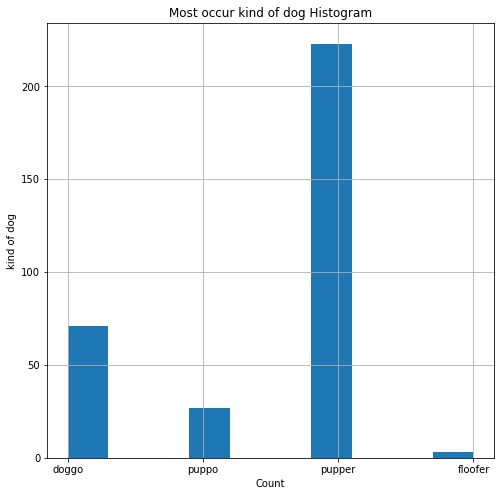

In [172]:
df_master['dog_kind'].hist(figsize =(8,8));
plt.title('Most occur kind of dog Histogram')
plt.ylabel('kind of dog')
plt.xlabel('Count')


Its clear that pupper has occured the most where floofer is the lowest

### Q3: Describe the relationship between retweets and favorites 

Text(0.5, 1.0, 'The relationship between Retweets &Favorites ')

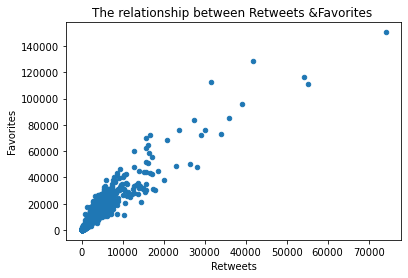

In [180]:
df_master.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('The relationship between Retweets &Favorites ')

We can say that the realationship is positively strong

### Q4:Does favorite changes significantly over the years?

In [184]:
df_temp = df_master.groupby(by="year").favorite_count.sum()
df_temp.head()

year
2015    1480554
2016    6787881
2017    7624112
Name: favorite_count, dtype: int64

In [197]:
years=[2015,2016,2017]
num_of_fav=[1480554,6787881,7624112]

Text(0.5, 1.0, 'The relationship between years & Favorites ')

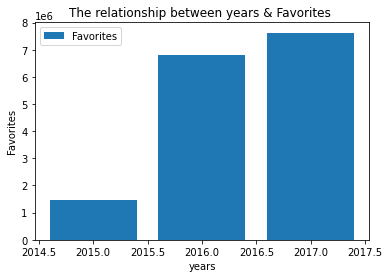

In [199]:
plt.bar(years,num_of_fav,label="Favorites")
plt.legend()
plt.xlabel('years')
plt.ylabel('Favorites')
plt.title('The relationship between years & Favorites ')

2017 got the highest Favorites and there is a significant change from 2015 to 2016

NOTE: I don't know why I'm getting year.5 

# End of the project